In [1]:
import os
import re  # regular expression
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
sns.set_style('darkgrid')

UsageError: Line magic function `%` not found.


In [2]:
data_folder = "bbc"
folders = ["business", "entertainment", "politics", "sport", "tech"]
os.chdir(data_folder)

In [3]:
title = []
content = []
category = []
category_id = []
filename = []

for i, folder in enumerate(folders):
    files = os.listdir(folder)  # list all the files in the dir: '001.txt','002.txt'...
    
    for text_file in files:
        file_path = folder + "/" + text_file
        
        print("reading file:", file_path)
        with open(file_path) as f:
            data = f.readlines()
            
        title.append(data[0].strip('\n')) 
        
        data = ' '.join(data)
        content.append(data)
        category.append(folder)
        category_id.append(i)
        
    filename += files          # concatenate all file names of all 5 folders 

# create a DataFrame
df = pd.DataFrame(data=content, columns=['content'])
# add different columns into the DataFrame
df['category'] = category
df['category_id'] = category_id
df['title'] = title
df['filename'] = filename
df = df[['category', 'filename', 'title', 'content', 'category_id']]  # reordering

print('writing csv flie ...')

reading file: business/001.txt
reading file: business/002.txt
reading file: business/003.txt
reading file: business/004.txt
reading file: business/005.txt
reading file: business/006.txt
reading file: business/007.txt
reading file: business/008.txt
reading file: business/009.txt
reading file: business/010.txt
reading file: business/011.txt
reading file: business/012.txt
reading file: business/013.txt
reading file: business/014.txt
reading file: business/015.txt
reading file: business/016.txt
reading file: business/017.txt
reading file: business/018.txt
reading file: business/019.txt
reading file: business/020.txt
reading file: business/021.txt
reading file: business/022.txt
reading file: business/023.txt
reading file: business/024.txt
reading file: business/025.txt
reading file: business/026.txt
reading file: business/027.txt
reading file: business/028.txt
reading file: business/029.txt
reading file: business/030.txt
reading file: business/031.txt
reading file: business/032.txt
reading 

reading file: business/275.txt
reading file: business/276.txt
reading file: business/277.txt
reading file: business/278.txt
reading file: business/279.txt
reading file: business/280.txt
reading file: business/281.txt
reading file: business/282.txt
reading file: business/283.txt
reading file: business/284.txt
reading file: business/285.txt
reading file: business/286.txt
reading file: business/287.txt
reading file: business/288.txt
reading file: business/289.txt
reading file: business/290.txt
reading file: business/291.txt
reading file: business/292.txt
reading file: business/293.txt
reading file: business/294.txt
reading file: business/295.txt
reading file: business/296.txt
reading file: business/297.txt
reading file: business/298.txt
reading file: business/299.txt
reading file: business/300.txt
reading file: business/301.txt
reading file: business/302.txt
reading file: business/303.txt
reading file: business/304.txt
reading file: business/305.txt
reading file: business/306.txt
reading 

reading file: entertainment/034.txt
reading file: entertainment/035.txt
reading file: entertainment/036.txt
reading file: entertainment/037.txt
reading file: entertainment/038.txt
reading file: entertainment/039.txt
reading file: entertainment/040.txt
reading file: entertainment/041.txt
reading file: entertainment/042.txt
reading file: entertainment/043.txt
reading file: entertainment/044.txt
reading file: entertainment/045.txt
reading file: entertainment/046.txt
reading file: entertainment/047.txt
reading file: entertainment/048.txt
reading file: entertainment/049.txt
reading file: entertainment/050.txt
reading file: entertainment/051.txt
reading file: entertainment/052.txt
reading file: entertainment/053.txt
reading file: entertainment/054.txt
reading file: entertainment/055.txt
reading file: entertainment/056.txt
reading file: entertainment/057.txt
reading file: entertainment/058.txt
reading file: entertainment/059.txt
reading file: entertainment/060.txt
reading file: entertainment/

reading file: entertainment/272.txt
reading file: entertainment/273.txt
reading file: entertainment/274.txt
reading file: entertainment/275.txt
reading file: entertainment/276.txt
reading file: entertainment/277.txt
reading file: entertainment/278.txt
reading file: entertainment/279.txt
reading file: entertainment/280.txt
reading file: entertainment/281.txt
reading file: entertainment/282.txt
reading file: entertainment/283.txt
reading file: entertainment/284.txt
reading file: entertainment/285.txt
reading file: entertainment/286.txt
reading file: entertainment/287.txt
reading file: entertainment/288.txt
reading file: entertainment/289.txt
reading file: entertainment/290.txt
reading file: entertainment/291.txt
reading file: entertainment/292.txt
reading file: entertainment/293.txt
reading file: entertainment/294.txt
reading file: entertainment/295.txt
reading file: entertainment/296.txt
reading file: entertainment/297.txt
reading file: entertainment/298.txt
reading file: entertainment/

reading file: politics/140.txt
reading file: politics/141.txt
reading file: politics/142.txt
reading file: politics/143.txt
reading file: politics/144.txt
reading file: politics/145.txt
reading file: politics/146.txt
reading file: politics/147.txt
reading file: politics/148.txt
reading file: politics/149.txt
reading file: politics/150.txt
reading file: politics/151.txt
reading file: politics/152.txt
reading file: politics/153.txt
reading file: politics/154.txt
reading file: politics/155.txt
reading file: politics/156.txt
reading file: politics/157.txt
reading file: politics/158.txt
reading file: politics/159.txt
reading file: politics/160.txt
reading file: politics/161.txt
reading file: politics/162.txt
reading file: politics/163.txt
reading file: politics/164.txt
reading file: politics/165.txt
reading file: politics/166.txt
reading file: politics/167.txt
reading file: politics/168.txt
reading file: politics/169.txt
reading file: politics/170.txt
reading file: politics/171.txt
reading 

reading file: politics/413.txt
reading file: politics/414.txt
reading file: politics/415.txt
reading file: politics/416.txt
reading file: politics/417.txt
reading file: sport/001.txt
reading file: sport/002.txt
reading file: sport/003.txt
reading file: sport/004.txt
reading file: sport/005.txt
reading file: sport/006.txt
reading file: sport/007.txt
reading file: sport/008.txt
reading file: sport/009.txt
reading file: sport/010.txt
reading file: sport/011.txt
reading file: sport/012.txt
reading file: sport/013.txt
reading file: sport/014.txt
reading file: sport/015.txt
reading file: sport/016.txt
reading file: sport/017.txt
reading file: sport/018.txt
reading file: sport/019.txt
reading file: sport/020.txt
reading file: sport/021.txt
reading file: sport/022.txt
reading file: sport/023.txt
reading file: sport/024.txt
reading file: sport/025.txt
reading file: sport/026.txt
reading file: sport/027.txt
reading file: sport/028.txt
reading file: sport/029.txt
reading file: sport/030.txt
readi

reading file: sport/288.txt
reading file: sport/289.txt
reading file: sport/290.txt
reading file: sport/291.txt
reading file: sport/292.txt
reading file: sport/293.txt
reading file: sport/294.txt
reading file: sport/295.txt
reading file: sport/296.txt
reading file: sport/297.txt
reading file: sport/298.txt
reading file: sport/299.txt
reading file: sport/300.txt
reading file: sport/301.txt
reading file: sport/302.txt
reading file: sport/303.txt
reading file: sport/304.txt
reading file: sport/305.txt
reading file: sport/306.txt
reading file: sport/307.txt
reading file: sport/308.txt
reading file: sport/309.txt
reading file: sport/310.txt
reading file: sport/311.txt
reading file: sport/312.txt
reading file: sport/313.txt
reading file: sport/314.txt
reading file: sport/315.txt
reading file: sport/316.txt
reading file: sport/317.txt
reading file: sport/318.txt
reading file: sport/319.txt
reading file: sport/320.txt
reading file: sport/321.txt
reading file: sport/322.txt
reading file: sport/

reading file: tech/075.txt
reading file: tech/076.txt
reading file: tech/077.txt
reading file: tech/078.txt
reading file: tech/079.txt
reading file: tech/080.txt
reading file: tech/081.txt
reading file: tech/082.txt
reading file: tech/083.txt
reading file: tech/084.txt
reading file: tech/085.txt
reading file: tech/086.txt
reading file: tech/087.txt
reading file: tech/088.txt
reading file: tech/089.txt
reading file: tech/090.txt
reading file: tech/091.txt
reading file: tech/092.txt
reading file: tech/093.txt
reading file: tech/094.txt
reading file: tech/095.txt
reading file: tech/096.txt
reading file: tech/097.txt
reading file: tech/098.txt
reading file: tech/099.txt
reading file: tech/100.txt
reading file: tech/101.txt
reading file: tech/102.txt
reading file: tech/103.txt
reading file: tech/104.txt
reading file: tech/105.txt
reading file: tech/106.txt
reading file: tech/107.txt
reading file: tech/108.txt
reading file: tech/109.txt
reading file: tech/110.txt
reading file: tech/111.txt
r

reading file: tech/385.txt
reading file: tech/386.txt
reading file: tech/387.txt
reading file: tech/388.txt
reading file: tech/389.txt
reading file: tech/390.txt
reading file: tech/391.txt
reading file: tech/392.txt
reading file: tech/393.txt
reading file: tech/394.txt
reading file: tech/395.txt
reading file: tech/396.txt
reading file: tech/397.txt
reading file: tech/398.txt
reading file: tech/399.txt
reading file: tech/400.txt
reading file: tech/401.txt
writing csv flie ...


In [4]:
df.head()

,category,filename,title,content,category_id
0,business,001.txt,Ad sales boost Time Warner profit,Ad sales boost Time Warner profit\n \n Quarter...,0
1,business,002.txt,Dollar gains on Greenspan speech,Dollar gains on Greenspan speech\n \n The doll...,0
2,business,003.txt,Yukos unit buyer faces loan claim,Yukos unit buyer faces loan claim\n \n The own...,0
3,business,004.txt,High fuel prices hit BA's profits,High fuel prices hit BA's profits\n \n British...,0
4,business,005.txt,Pernod takeover talk lifts Domecq,Pernod takeover talk lifts Domecq\n \n Shares ...,0


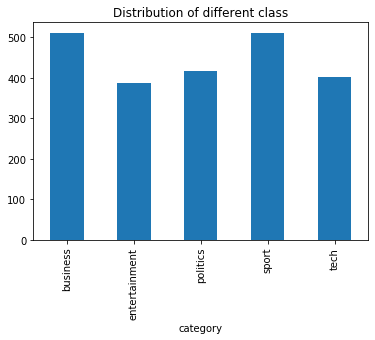

In [5]:
df.groupby('category')['title'].count().plot.bar(ylim=0)
plt.title('Distribution of different class');

In [6]:
def remove_nonwords(string):
    string = re.sub(r"\'s", "", string)        # remove 's in the string
    string = re.sub(r"\'ve", "", string)
    string = re.sub(r"n\'t", "", string)
    string = re.sub(r"\'re", "", string)
    string = re.sub(r"\'d", "", string)
    string = re.sub(r"\'ll", "", string)
    string = re.sub(r",", "", string)
    string = re.sub(r"!", "", string)
    string = re.sub(r"\(", "", string)
    string = re.sub(r"\)", "", string)
    string = re.sub(r"\?", "", string)
    string = re.sub(r"'", "", string)
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)  # remove alphabets
    string = re.sub(r"[0-9]\w+|[0-9]","", string)           # remove numbers
    string = re.sub(r"\s{2,}", " ", string)
    return string.strip().lower()      

In [7]:
words = stopwords.words('english')
stemmer = SnowballStemmer('english')
df['cleaned'] = df['content'].apply(lambda x: ' '.join([stemmer.stem(i) for i in remove_nonwords(x).split() if i not in words]))

In [8]:
df['content'][0]

'Ad sales boost Time Warner profit\n \n Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (Â£600m) for the three months to December, from $639m year-earlier.\n \n The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n \n Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try

In [9]:
df['cleaned'][0]

'ad sale boost time warner profit quarter profit us media giant timewarn jump three month decemb year earlier firm one biggest investor googl benefit sale high speed internet connect higher advert sale timewarn said fourth quarter sale rose profit buoy one gain offset profit dip warner bros less user aol time warner said friday own search engin googl internet busi aol mix fortun lost subscrib fourth quarter profit lower preced three quarter howev compani said aol under profit except item rose back stronger internet advertis revenu hope increas subscrib offer onlin servic free timewarn internet custom tri sign aol exist custom high speed broadband timewarn also restat result follow probe us secur exchang commiss sec close conclud time warner fourth quarter profit slight better analyst expect film divis saw profit slump help box offic flop alexand catwoman sharp contrast year earlier third final film lord ring trilog boost result full year timewarn post profit perform revenu grew financi

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df['cleaned'], df['category_id'], test_size=0.2, random_state=0)

In [11]:
X_train.head()

841     incred win anim award incred movi beaten shrek...
1748    hantuchova dubai last eight daniela hantuchova...
2118    power peopl say hp digit revolut focus let peo...
1174    amnesti chief lament war failur lack public ou...
1502    sa return mauritius top seed south africa retu...
Name: cleaned, dtype: object

In [12]:
TfidVect = TfidfVectorizer(sublinear_tf=True, min_df=1, ngram_range=(1, 1), stop_words='english')
X_train_vect = TfidVect.fit_transform(X_train).toarray()
X_train_vect.shape

(1780, 17076)

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [15]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))]) 

In [16]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                               

In [17]:
y_pred = clf.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
confusion_matrix(y_test, y_pred)

array([[108,   0,   3,   0,   0],
       [  2,  69,   1,   0,   2],
       [  5,   0,  80,   1,   0],
       [  1,   0,   0, 107,   0],
       [  5,   0,   0,   1,  60]], dtype=int64)

In [19]:
accuracy_score(y_test, y_pred)

0.952808988764045

In [41]:
f = open("classify_text.txt", encoding="utf8")

In [42]:
lines = f.readlines()
lines

['White-Collar Companies Race to Be Last to Return to the Office\n',
 'Google, Facebook, Amazon, Capital One and others are extending work-from-home policies to September and sometimes far beyond.\n',
 '\n',
 '\n',
 '\n',
 'Credit...Jackson Gibbs\n',
 'David Streitfeld\n',
 'By David Streitfeld\n',
 'May 8, 2020\n',
 '\n',
 'Even as President Trump has said “we have to get our country open again,” much of corporate America is in no rush to return employees to their campuses and skyscrapers. The companies are racing not to be the first back, but the last.\n',
 '\n',
 'An increasing number of them, which mostly have white-collar employees, have recently extended work-from-home policies far beyond the shelter-in-place timelines mandated by state and local authorities.\n',
 '\n',
 'Google and Facebook employees were told Thursday that they could stay home until next year. Capital One informed 40,000 workers that they will be out through Labor Day and possibly longer. Amazon is saying Octob

In [46]:
X_forPredict_orig = ' '.join(lines)
X_forPredict_cleaned = ' '.join([stemmer.stem(i) for i in remove_nonwords(X_forPredict_orig).split() if i not in words])

In [47]:
X_forPredict_orig

'White-Collar Companies Race to Be Last to Return to the Office\n Google, Facebook, Amazon, Capital One and others are extending work-from-home policies to September and sometimes far beyond.\n \n \n \n Credit...Jackson Gibbs\n David Streitfeld\n By David Streitfeld\n May 8, 2020\n \n Even as President Trump has said “we have to get our country open again,” much of corporate America is in no rush to return employees to their campuses and skyscrapers. The companies are racing not to be the first back, but the last.\n \n An increasing number of them, which mostly have white-collar employees, have recently extended work-from-home policies far beyond the shelter-in-place timelines mandated by state and local authorities.\n \n Google and Facebook employees were told Thursday that they could stay home until next year. Capital One informed 40,000 workers that they will be out through Labor Day and possibly longer. Amazon is saying October. Nationwide Insurance is moving more aggressively than

In [48]:
X_forPredict_cleaned

'white collar compani race last return offic googl facebook amazon capit one other extend work home polici septemb sometim far beyond credit jackson gibb david streitfeld david streitfeld may even presid trump said get countri open much corpor america rush return employe campus skyscrap compani race first back last increas number most white collar employe recent extend work home polici far beyond shelter place timelin mandat state local author googl facebook employe told thursday could stay home next year capit one inform worker labor day possibl longer amazon say octob nationwid insur move aggress firm shutter five offic around countri employe telecommut perman move reflect realiti one sure coronavirus pandem evolv death virus hot zone like new york citi come new outbreak emerg elsewher almost everi day least new case u bring countri total million even coronavirus longer requir work home like retain signific presenc corpor life affect shape citi commerci real estat industri chang cult

In [49]:
print('The category of this news is predicted as: ' + folders[clf.predict([X_forPredict_cleaned])[0]])

The category of this news is predicted as: tech


In [53]:
file = open("data_for_embeddings.txt", encoding="utf8")

In [ ]:
data = 